In [2]:
import chart_studio.plotly
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx 
#matplotlib inline 
from IPython.display import display
from PIL import Image


In [3]:
e = pd.read_csv('C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/edges.csv') # Edges
e.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [6]:
h = pd.read_csv("C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/hero-network.csv")
h.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [5]:
n = pd.read_csv('C:/Users/Loura Shiny/Desktop/SIN/Project/Dataset/nodes.csv') # Nodes
n.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


### About each graph

In [7]:
#edge graph
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96104 entries, 0 to 96103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero    96104 non-null  object
 1   comic   96104 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [8]:
#hero-network graph
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [9]:
#nodes graph
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB


In [10]:
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
nx.info(he)

#Returns a graph from Pandas DataFrame containing an edge list. The Pandas DataFrame should contain at least two columns of node names and zero or more columns of edge attributes. Each row will be processed as one edge instance.

'Graph with 6426 nodes and 167219 edges'

### Degree Centrality

In [11]:
#Degree Centrality - to calculate the centre of the group
MF = nx.degree_centrality(he)

#printing top 10
print("Degree Centrality Top 10: \n")
counter = 0
for w in sorted(MF, key = MF.get , reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,'{:0.2f}'.format(MF[w]))

Degree Centrality Top 10: 

CAPTAIN AMERICA 0.30
SPIDER-MAN/PETER PAR 0.27
IRON MAN/TONY STARK  0.24
THING/BENJAMIN J. GR 0.22
MR. FANTASTIC/REED R 0.21
WOLVERINE/LOGAN  0.21
HUMAN TORCH/JOHNNY S 0.21
SCARLET WITCH/WANDA  0.21
THOR/DR. DONALD BLAK 0.20
BEAST/HENRY &HANK& P 0.20


### Eigen Vector Centrality

In [13]:
#EigenVector - the top 10 of knowing more superheroes for (appeared, help, fight along , etc)

EV = nx.eigenvector_centrality(he)

#printing top 10
print("Eigen Value Top 10: \n")
counter = 0
for w in sorted(EV, key =EV.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(EV[w]))

Eigen Value Top 10: 

CAPTAIN AMERICA 0.1168
IRON MAN/TONY STARK  0.1025
SCARLET WITCH/WANDA  0.1008
THING/BENJAMIN J. GR 0.1008
SPIDER-MAN/PETER PAR 0.1002
MR. FANTASTIC/REED R 0.0997
VISION  0.0985
HUMAN TORCH/JOHNNY S 0.0985
WOLVERINE/LOGAN  0.0984
BEAST/HENRY &HANK& P 0.0955


### Betweeness Centrality

In [17]:
#Betweeness_Centrality - This is the guy who know everyone and the one who can get what you need, the top 10 friend that any super heroe should have arer (appeared, help, fight along , etc)

BC = nx.betweenness_centrality(he) 

#printing top 10
print("Betweeness Centrality Top 10: \n")
counter = 0
for w in sorted(BC, key =BC.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(BC[w]))

Betweeness Centrality Top 10: 

SPIDER-MAN/PETER PAR 0.0735
CAPTAIN AMERICA 0.0570
IRON MAN/TONY STARK  0.0372
WOLVERINE/LOGAN  0.0357
HAVOK/ALEX SUMMERS  0.0357
DR. STRANGE/STEPHEN  0.0292
THING/BENJAMIN J. GR 0.0254
HAWK 0.0248
HULK/DR. ROBERT BRUC 0.0239
MR. FANTASTIC/REED R 0.0238


### Closeness Centrality

In [14]:
#Closeness Centrality

CC = nx.closeness_centrality(he)

#printing top 10
print("Closeness Centrality Top 10: \n")
counter = 0
for w in sorted(CC, key =CC.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(CC[w]))


Closeness Centrality Top 10: 

CAPTAIN AMERICA 0.5837
SPIDER-MAN/PETER PAR 0.5741
IRON MAN/TONY STARK  0.5614
THING/BENJAMIN J. GR 0.5578
MR. FANTASTIC/REED R 0.5561
WOLVERINE/LOGAN  0.5549
HUMAN TORCH/JOHNNY S 0.5548
SCARLET WITCH/WANDA  0.5523
THOR/DR. DONALD BLAK 0.5509
BEAST/HENRY &HANK& P 0.5491


### Harmonic Centrality

In [15]:
#Harmonic Centrality

HC = nx.harmonic_centrality(he)

#printing top 10
print("Harmonic Centrality Top 10: \n")
counter = 0
for w in sorted(HC, key =HC.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(HC[w]))

Harmonic Centrality Top 10: 

CAPTAIN AMERICA 4150.1667
SPIDER-MAN/PETER PAR 4063.3333
IRON MAN/TONY STARK  3949.8333
THING/BENJAMIN J. GR 3902.0000
MR. FANTASTIC/REED R 3883.8333
WOLVERINE/LOGAN  3877.1667
HUMAN TORCH/JOHNNY S 3873.6667
SCARLET WITCH/WANDA  3852.8333
THOR/DR. DONALD BLAK 3835.8333
BEAST/HENRY &HANK& P 3822.3333


### Load Centrality

In [16]:
#Load Centrality
LC = nx.load_centrality(he)

#printing top 10
print("Load Centrality Top 10: \n")
counter = 0
for w in sorted(LC, key =LC.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(LC[w]))

Load Centrality Top 10: 

SPIDER-MAN/PETER PAR 0.0722
CAPTAIN AMERICA 0.0561
IRON MAN/TONY STARK  0.0360
WOLVERINE/LOGAN  0.0347
HAVOK/ALEX SUMMERS  0.0344
DR. STRANGE/STEPHEN  0.0280
THING/BENJAMIN J. GR 0.0243
HAWK 0.0236
HULK/DR. ROBERT BRUC 0.0233
THOR/DR. DONALD BLAK 0.0229


### Bipartite

In [22]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout

In [23]:
# Full bipartite graph

# Separate comic and hero nodes
comic_node = n['node'][n['type'] == 'comic'].unique()
hero_node = n['node'][n['type'] == 'hero'].unique()

# Make the edge data as a 2-tuple
edges_tuple = e.values.tolist()
edges_tuple = [tuple(x) for x in edges_tuple]

# Make numpy array to list
comic_node_list = comic_node.tolist()
hero_node_list = hero_node.tolist()

# Make a blank graph
bipart = nx.Graph()
# Add nodes
bipart.add_nodes_from(comic_node_list, bipartite=0)
bipart.add_nodes_from(hero_node_list, bipartite=1)
bipart.add_node("SPIDER-MAN/PETER PARKER", bipartite=1) # Manually added a node that was somehow not included 

# Add edges
bipart.add_edges_from(edges_tuple)

# Separate nodes
top_nodes = {n for n, d in bipart.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(bipart) - top_nodes

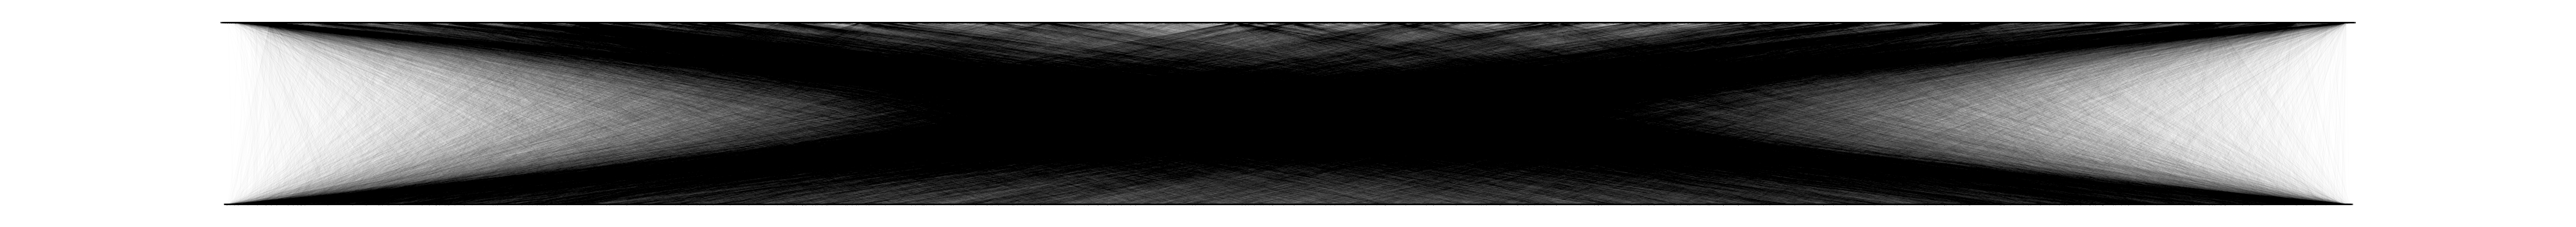

In [25]:
# Visualization
plt.figure(figsize=(70, 6))
pos = bipartite_layout(bipart, top_nodes, align='horizontal')
nx.draw(bipart, pos=pos, node_size=10, node_color='lightblue', alpha=0.01)
nx.draw_networkx_labels(bipart, pos=pos, font_size=3)
plt.show()

### Projection to unipartite graph

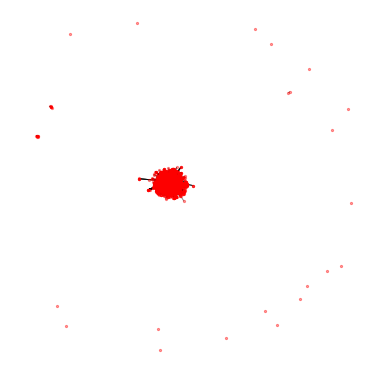

In [26]:
# Build a unipartite graph of hero
hero_graph = bipartite.projected_graph(bipart, hero_node_list, multigraph=False)

# Visualization
plt.figure(figsize=(5, 5))
pos=nx.spring_layout(hero_graph)
nx.draw(hero_graph, pos=pos, node_size=5, node_color='red', alpha=0.4)
nx.draw_networkx_edges(hero_graph, pos=pos, alpha=0.1)
plt.show()

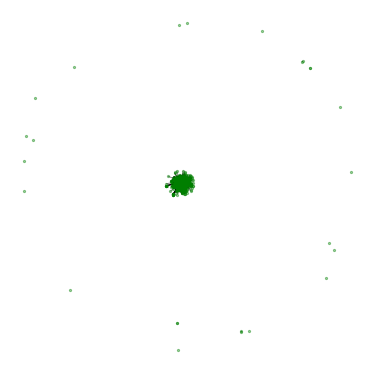

In [30]:
# Build a unipartite graph of comic
comic_graph = bipartite.projected_graph(bipart, comic_node_list, multigraph=False)

# Visualization
plt.figure(figsize=(5, 5))
pos=nx.spring_layout(comic_graph)
nx.draw(comic_graph, pos=pos, node_size=5, node_color='green', alpha=0.4)
nx.draw_networkx_edges(comic_graph, pos=pos, alpha=0.1)
plt.show()

### Insights from the graphs

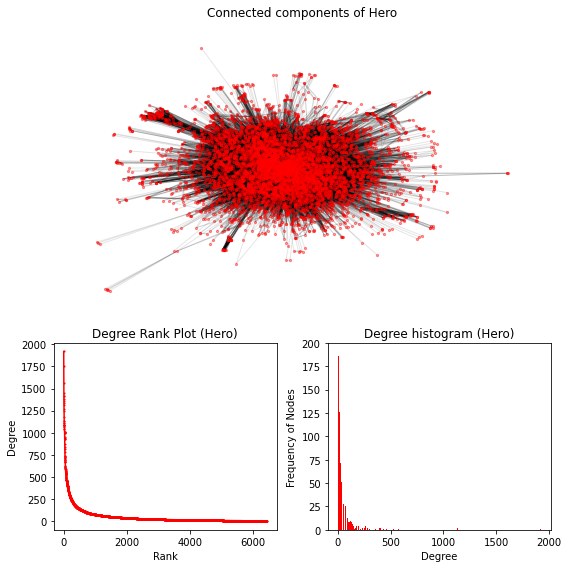

In [28]:
# Distribution of degrees: Hero

# Ranking of nodes regarding the number of degrees
degree_sequence = sorted([d for n, d in hero_graph.degree()], reverse=True)

# Extract connected nodes to visualize
Gcc = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])

# Visualization
fig = plt.figure("Degree of the hero graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5, alpha=0.4, node_color='red')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of Hero")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, marker="o", markersize=1, color='red')
ax1.set_title("Degree Rank Plot (Hero)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='red')
ax2.set_title("Degree histogram (Hero)")
ax2.set_xlabel("Degree")
ax2.set_ylim([0, 200])
ax2.set_ylabel("Frequency of Nodes")

fig.tight_layout()
plt.show()

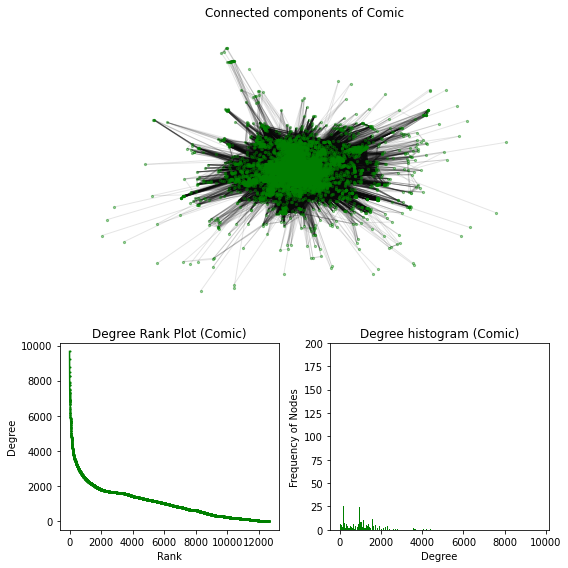

In [31]:
# Distribution of degrees: Comic

# Ranking of nodes regarding the number of degrees
degree_sequence = sorted([d for n, d in comic_graph.degree()], reverse=True)

# Extract connected nodes to visualize
Gcc = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])

# Visualization
fig = plt.figure("Degree of the comic graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5, alpha=0.4, node_color='green')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of Comic")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, marker="o", markersize=1, color='green')
ax1.set_title("Degree Rank Plot (Comic)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='green')
ax2.set_title("Degree histogram (Comic)")
ax2.set_xlabel("Degree")
ax2.set_ylim([0, 200])
ax2.set_ylabel("Frequency of Nodes")

fig.tight_layout()
plt.show()

### Find communities

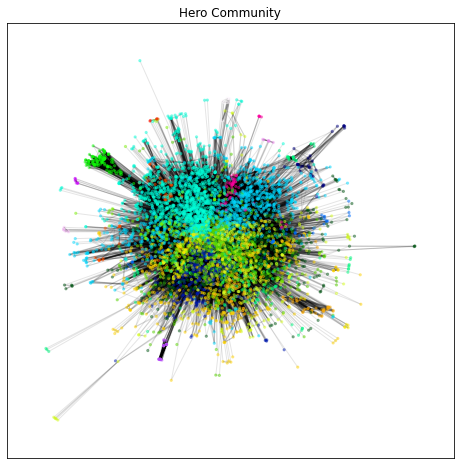

In [53]:
from community import community_louvain
import matplotlib.cm as cm
# Visualization of communities divided by Louvain algorithm: Hero

# Extract connected nodes to visualize
Gcc = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])

# Community division
partition_hero = community_louvain.best_partition(Gcc)

# Color the nodes according to community
cmap = cm.get_cmap('gist_ncar', max(partition_hero.values()) + 1)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, partition_hero.keys(), node_size=5, alpha=0.4,cmap=cmap, node_color=list(partition_hero.values()))
nx.draw_networkx_edges(Gcc, pos, alpha=0.1)
plt.title("Hero Community")
plt.show()

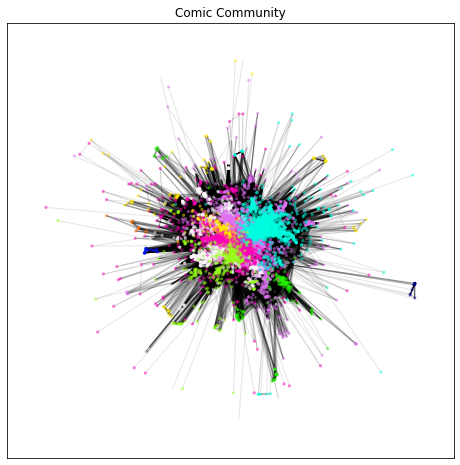

In [54]:
# Visualization of communities divided by Louvain algorithm: Comic

# Extract connected nodes to visualize
Gcc = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])

# Community division
partition_comic = community_louvain.best_partition(Gcc)

# Color the nodes according to community
cmap = cm.get_cmap('gist_ncar', max(partition_comic.values()) + 1)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, partition_comic.keys(), node_size=5, alpha=0.4,
                       cmap=cmap, node_color=list(partition_comic.values()))
nx.draw_networkx_edges(Gcc, pos, alpha=0.1)
plt.title("Comic Community")
plt.show()

### Modularity 

In [55]:
# Modularity (Evaluate the community dividion)
import networkx.algorithms.community as nx_comm

hero_modu = nx_comm.modularity(hero_graph, nx_comm.label_propagation_communities(hero_graph))
comic_modu = nx_comm.modularity(comic_graph, nx_comm.label_propagation_communities(comic_graph))

print('Modularity of Hero network: ', round(hero_modu, 4))
print('Modularity of Comic network: ', round(comic_modu, 4))

Modularity of Hero network:  0.0553
Modularity of Comic network:  0.0032


In [56]:
# Analyze community info
Gcc_hero = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])
partition_hero = community_louvain.best_partition(Gcc_hero)

Gcc_comic = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])
partition_comic = community_louvain.best_partition(Gcc_comic)

partition_hero_df = pd.DataFrame(partition_hero.values(), index=partition_hero.keys(), columns=['Community'])
partition_comic_df = pd.DataFrame(partition_comic.values(), index=partition_comic.keys(), columns=['Community'])

In [64]:
# Number of communities
print('Number of Hero communities: ', partition_hero_df['Community'].nunique())
print('Number of Comic communities: ', partition_comic_df['Community'].nunique())

Number of Hero communities:  28
Number of Comic communities:  9


### General

### DEMATEL

In [10]:
#Step 1: Construct the network.
#Step 2: Calculate degree and distance between nodes
degrees = [val for (node, val) in he.degree()]
degrees.sort(reverse=True)
for i in range(6):
    print(degrees[i])
 

1908
1737
1522
1416
1379
1371
